In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import load_data

In [105]:
da = load_data.NSP_NW_da_data()
rt = load_data.NSP_NW_rt_data()

In [106]:
da = load_data.NSP_NW_da_data()[['interval_end_local', 'lmp']]
rt = load_data.NSP_NW_rt_data()[['interval_end_local', 'lmp']]

In [107]:
rt = rt[rt['interval_end_local'] > '2022-01-01']
da = da[da['interval_end_local'] > '2022-01-01']

In [108]:
rt.rename(columns = {'lmp': 'rt'}, inplace = True)

In [109]:
da.rename(columns = {'lmp': 'da'}, inplace=True)

In [110]:
merged = pd.merge(rt, da, on = 'interval_end_local', how = 'left')

In [111]:
fmerged = merged.ffill()

In [112]:
fmerged.dropna(inplace = True)

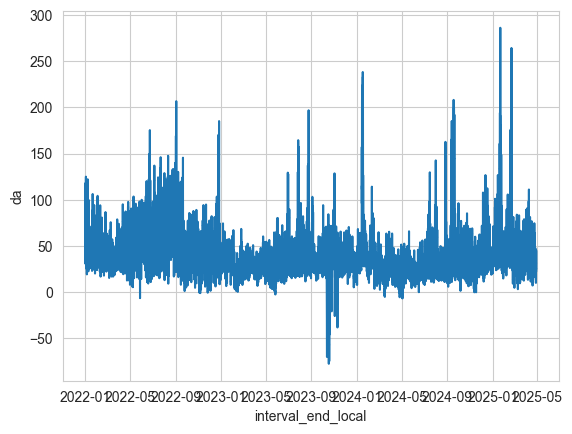

In [113]:
import seaborn as sns
sns.lineplot(fmerged, x = 'interval_end_local', y = 'da')
# sns.lineplot(fmerged, x = 'interval_end_local', y = 'rt')
plt.show()




In [61]:
fmerged

,interval_end_local,rt,da
11,2022-01-01 01:00:00-06:00,24.05,49.08
12,2022-01-01 01:05:00-06:00,24.07,49.08
13,2022-01-01 01:10:00-06:00,23.94,49.08
14,2022-01-01 01:15:00-06:00,23.79,49.08
15,2022-01-01 01:20:00-06:00,23.99,49.08
...,...,...,...
349327,2025-04-27 22:40:00-06:00,26.23,30.97
349328,2025-04-27 22:45:00-06:00,23.85,30.97
349329,2025-04-27 22:50:00-06:00,37.34,30.97
349330,2025-04-27 22:55:00-06:00,27.77,30.97


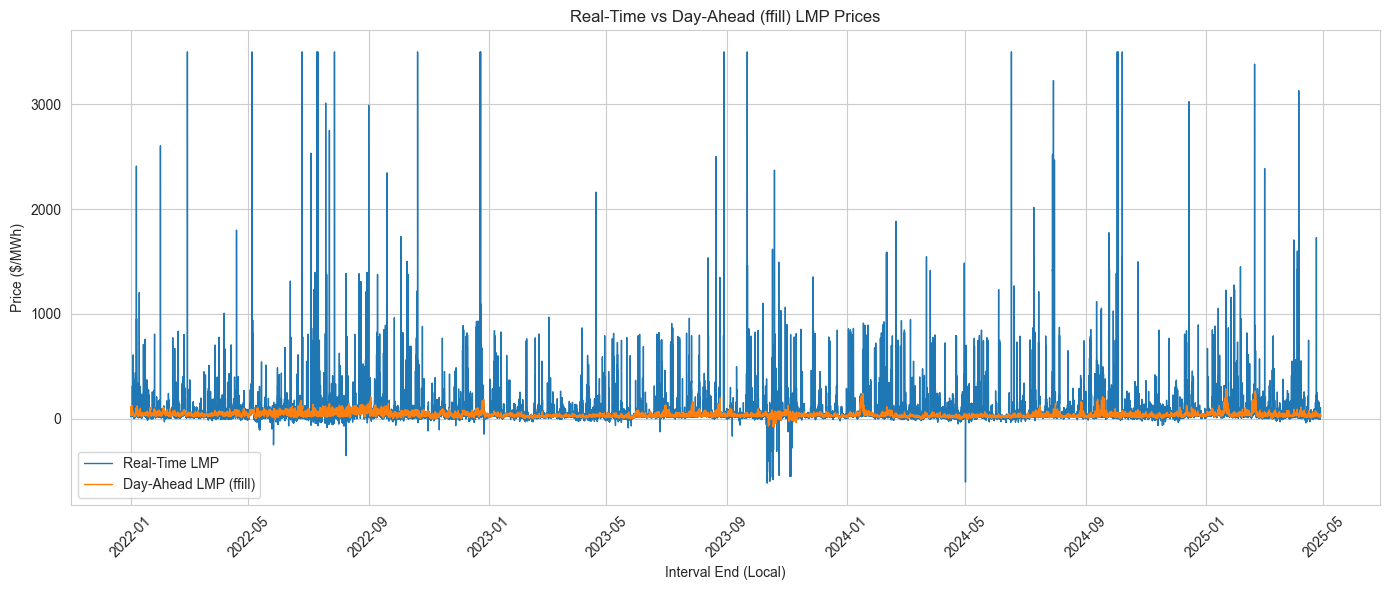

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(14, 6))

# Plot real-time prices
sns.lineplot(data=fmerged, x='interval_end_local', y='rt', label='Real-Time LMP', linewidth=1)

# Plot forward-filled day-ahead prices
sns.lineplot(data=fmerged, x='interval_end_local', y='da', label='Day-Ahead LMP (ffill)', linewidth=1)

plt.title('Real-Time vs Day-Ahead (ffill) LMP Prices')
plt.xlabel('Interval End (Local)')
plt.ylabel('Price ($/MWh)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [115]:
fmerged['spread'] = fmerged['da'] - fmerged['rt']

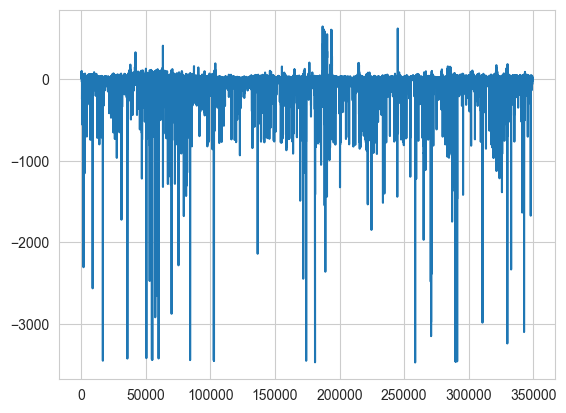

In [116]:
fmerged['spread'].plot()
plt.show()

In [78]:
from scipy.stats import zscore
fmerged['z_spread'] = zscore(fmerged['spread'])

In [83]:
fmerged['z_spread'].describe()

fmerged['remove_outliers'] = np.where(np.abs(fmerged['z_spread']) < 3, fmerged['z_spread'], np.nan)

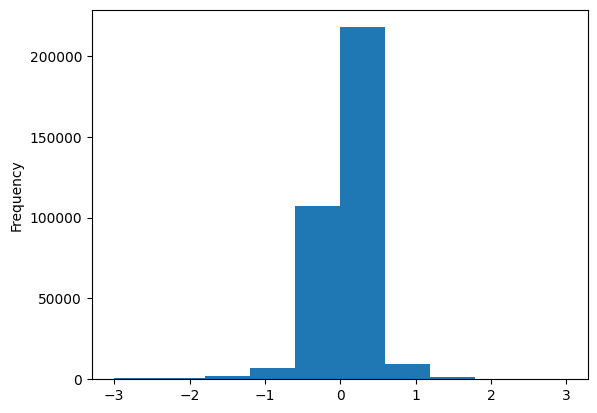

In [86]:
fmerged['remove_outliers'].plot(kind='hist')
plt.show()

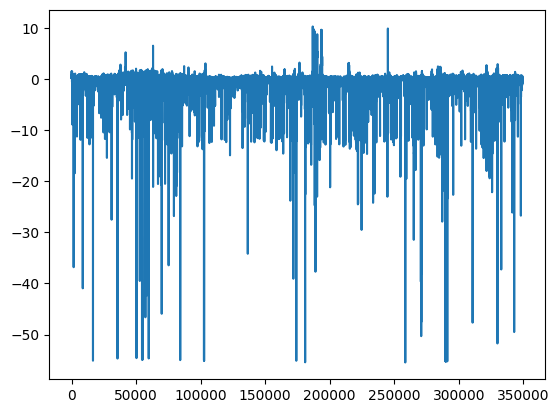

In [82]:
fmerged['z_spread'].plot()
plt.show()

In [117]:
counts = {'positive':0, 'negative':0}
for _ in fmerged['spread']:
    if _ > 0:
        counts['positive'] += 1
    if _ < 0:
        counts['negative'] += 1

In [118]:
counts

{'positive': 236602, 'negative': 112603}

In [119]:
ratio = counts['positive']/counts['negative']

In [120]:
ratio

2.1012051188689465

In [100]:
import requests

def get_btc_price():

    url = 'https://min-api.cryptocompare.com/data/price?fsym=BTC&tsyms=USD'
    response = requests.get(url)
    data = response.json()

    return data['USD']

In [102]:
get_btc_price()

103270.94